In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
data_test = pd.read_csv('dataset/blood_test.csv')
data = pd.read_csv('dataset/Blood_train.csv')

In [8]:
data_test_droped  = data_test[data_test['Disease'] != 'Heart Di']

In [9]:
data_test_droped['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Anemia', 'Thromboc', 'Healthy'],
      dtype=object)

In [10]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [11]:
data['Disease'].value_counts(normalize=True)

Disease
Anemia      0.264994
Healthy     0.236495
Diabetes    0.229689
Thalasse    0.216504
Thromboc    0.052318
Name: proportion, dtype: float64

In [12]:
data.shape

(2351, 25)

In [13]:
data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,0.447062,0.436679,0.381211,0.421708,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,0.242861,0.242865,0.232785,0.248768,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,0.034129,0.014596,0.005988,0.005579,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,0.219111,0.246885,0.179951,0.175469,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,0.444806,0.443725,0.359064,0.474378,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,0.654441,0.601662,0.580903,0.663382,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,0.966784,0.898210,0.829100,0.934617,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [14]:
data['Disease'].nunique()

5

In [15]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [16]:
label_encoder = LabelEncoder()

data['Disease_encoded'] = label_encoder.fit_transform(data['Disease'])

In [17]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,Disease_encoded
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy,2
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,3
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,3


In [18]:
label_encoder.classes_

array(['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'],
      dtype=object)

In [19]:
lable_mapping = dict(zip(data['Disease'] , data['Disease_encoded']))
lable_mapping

{'Healthy': 2, 'Diabetes': 1, 'Thalasse': 3, 'Anemia': 0, 'Thromboc': 4}

In [20]:
data_test_droped['Disease_encoded'] = label_encoder.transform(data_test_droped['Disease']) 

C:\Users\nihar\AppData\Local\Temp\ipykernel_2820\741806240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_droped['Disease_encoded'] = label_encoder.transform(data_test_droped['Disease'])


In [21]:
lable_mapping1 = dict(zip(data_test_droped['Disease'] , data_test_droped['Disease_encoded']))
lable_mapping1

{'Thalasse': 3, 'Diabetes': 1, 'Anemia': 0, 'Thromboc': 4, 'Healthy': 2}

In [22]:
data_test_droped.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,Disease_encoded
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,0.645755,0.070888,0.616684,0.168031,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse,3
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,0.353929,0.681551,0.498084,0.216581,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes,1
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,0.819216,0.542478,0.023462,0.744379,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes,1
6,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,0.741724,0.835773,0.942370,0.968535,0.884907,0.196416,0.141203,0.355437,0.468168,0.493548,0.213971,0.059427,0.836447,0.231356,Diabetes,1
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,0.857972,0.363073,0.882426,0.874039,0.756753,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990,Diabetes,1


In [23]:
#data.to_csv('train_data.csv', index = False)
#data_test_droped.to_csv('test_data.csv' , index=False)

In [24]:
train = pd.read_csv('dataset/train_data.csv')
test = pd.read_csv('dataset/test_data.csv')

In [25]:
train.shape

(2351, 26)

In [26]:
test.shape

(447, 26)

In [27]:
features = [feature for feature in train.columns if feature not in ['Disease' , 'Disease_encoded']]
features

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein']

In [28]:
#X = data[features]
#y = data['Disease_encoded']

X_train = train[features]
y_train = train['Disease_encoded']
X_test = test[features]
y_test = test['Disease_encoded']

In [29]:
#X_train , X_test , y_train , y_test = train_test_split(X , y , random_state= 42 ,test_size=0.30)

In [30]:
def evaluate_classification_model(model, X_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Compute classification error metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display the metrics
    metrics = pd.Series({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print("Classification Error Metrics:")
    print(metrics)
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    return metrics


d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Error Metrics:
Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64


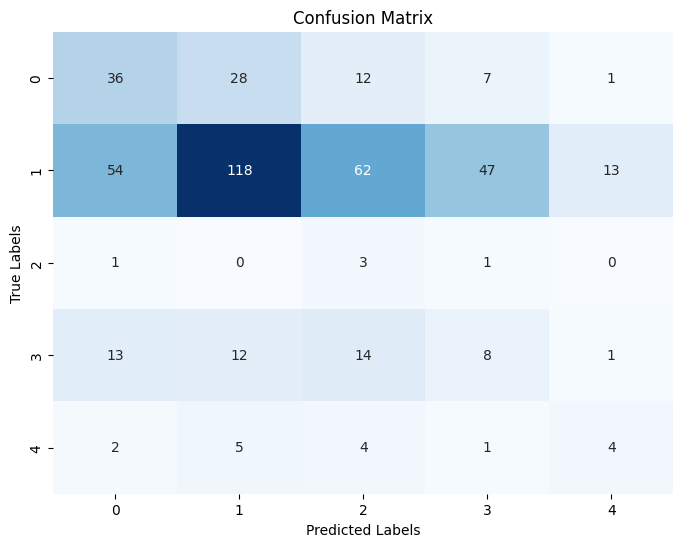

Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64

In [31]:
log_reg = LogisticRegression(penalty='l2' , random_state=1032)
log_reg.fit(X_train , y_train)
evaluate_classification_model(model = log_reg , X_test=X_test  ,y_test=y_test)

In [27]:
log_reg.fit(X_train , y_train)

d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1032)

In [28]:
y_pred = log_reg.predict(X_test)

Classification Error Metrics:
Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64


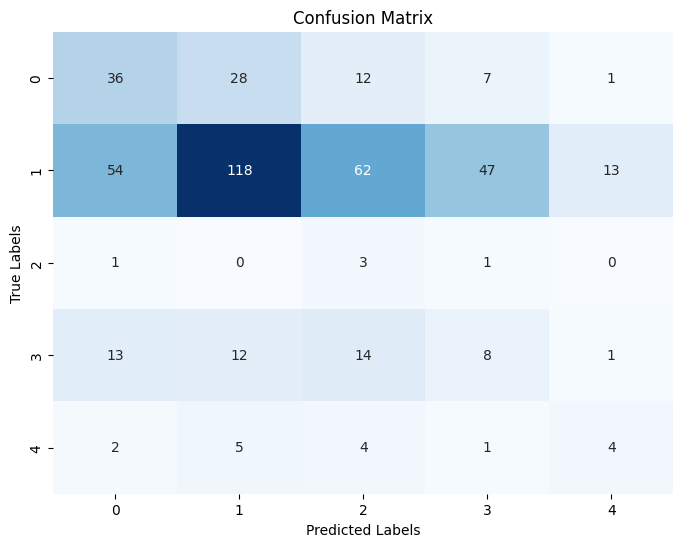

Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64

In [29]:
evaluate_classification_model(model = log_reg , X_test=X_test  ,y_test=y_test)

Classification Error Metrics:
Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64


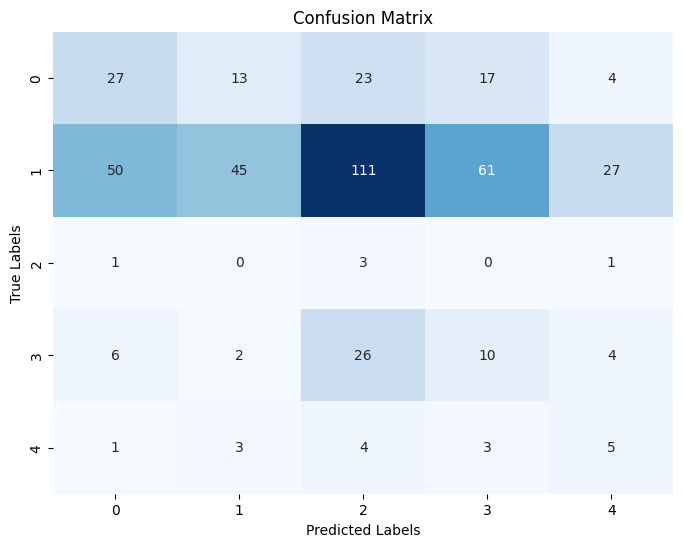

Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64

In [32]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train , y_train)
evaluate_classification_model(model = knn , X_test=X_test  ,y_test=y_test)

In [31]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

Classification Error Metrics:
Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64


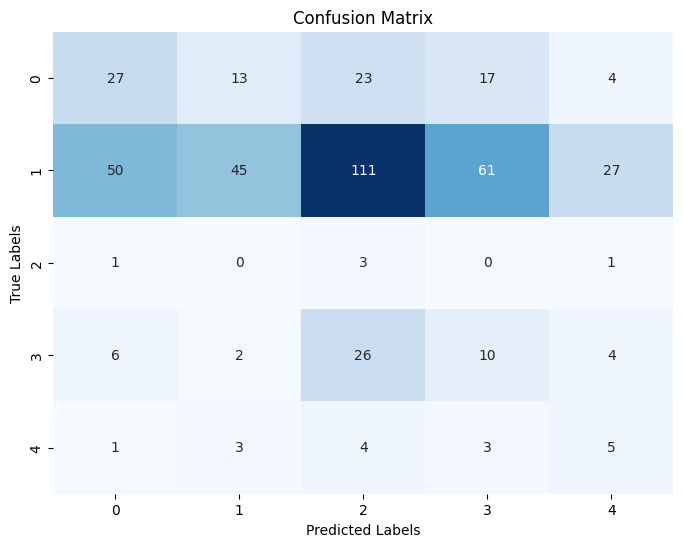

Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64

In [32]:
evaluate_classification_model(model = knn , X_test=X_test  ,y_test=y_test)

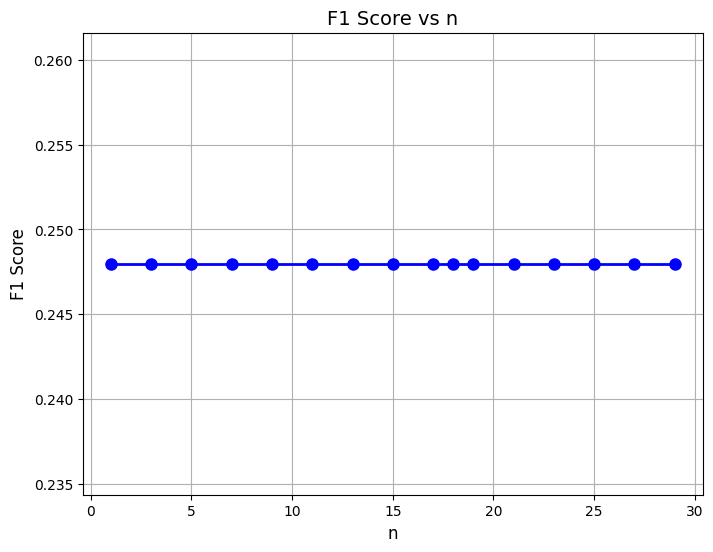

In [33]:
score = []
n = [1,3,5,7,9,11,13,15,17,18,19,21,23,25,27,29]

for i in n :
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    score.append(f1)
    
plt.figure(figsize=(8, 6))
plt.plot(n, score, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding labels and title
plt.xlabel('n', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs n', fontsize=14)

# Show grid
plt.grid(True)

# Show plot
plt.show()
    

In [35]:
svc = SVC(random_state=42)

Classification Error Metrics:
Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64


d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


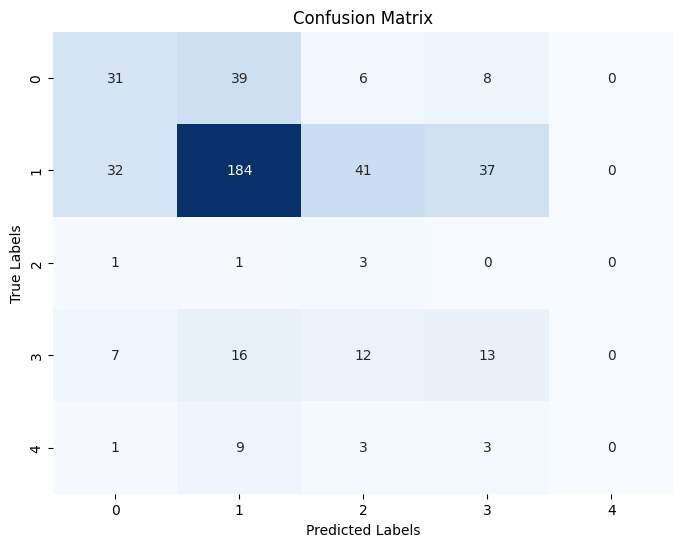

Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64

In [33]:
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

evaluate_classification_model(model = svc , X_test=X_test , y_test=y_test)

In [38]:
y_test.value_counts()

Disease_encoded
1    294
0     84
3     48
4     16
2      5
Name: count, dtype: int64

In [39]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Different kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4],                  # Degree for polynomial kernel
}


In [41]:
grid  = GridSearchCV(estimator=svc , param_grid=param_grid , cv = 5 , scoring='f1_weighted')

In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_weighted')

In [44]:
grid.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [45]:
grid.best_score_

np.float64(1.0)

Classification Error Metrics:
Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64


d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


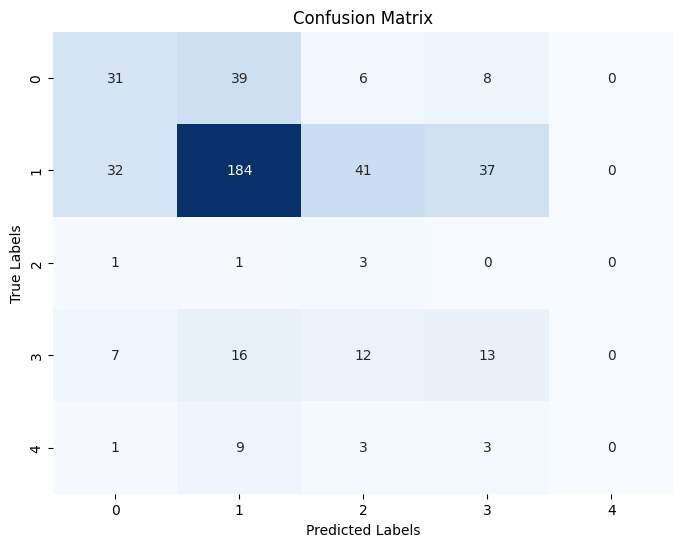

Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64

In [46]:
evaluate_classification_model(model = grid , X_test=X_test,y_test=y_test)

In [50]:
svc = SVC(C=0.1, degree = 2 , gamma = 'scale', kernel = 'rbf' , random_state=42)
svc.fit(X_train,y_train)

SVC(C=0.1, degree=2, random_state=42)

Classification Error Metrics:
Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64


d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


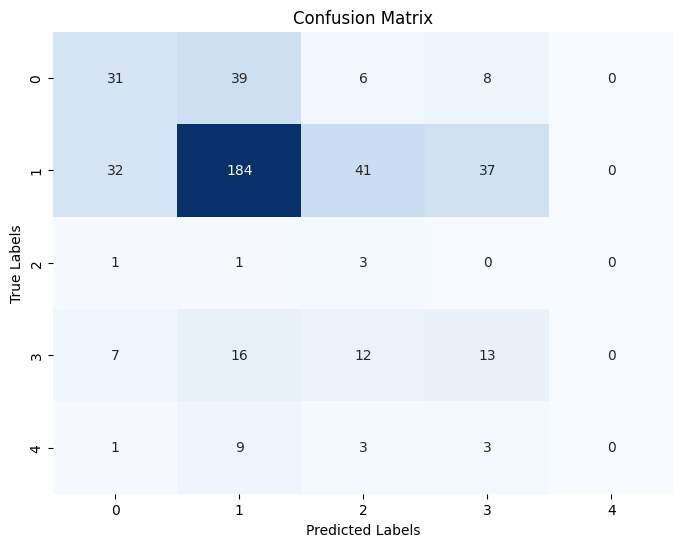

Accuracy     0.516779
Precision    0.590335
Recall       0.516779
F1 Score     0.547005
dtype: float64

In [51]:
evaluate_classification_model(model = svc , X_test=X_test,y_test=y_test)

Classification Error Metrics:
Accuracy     0.404922
Precision    0.568674
Recall       0.404922
F1 Score     0.429108
dtype: float64


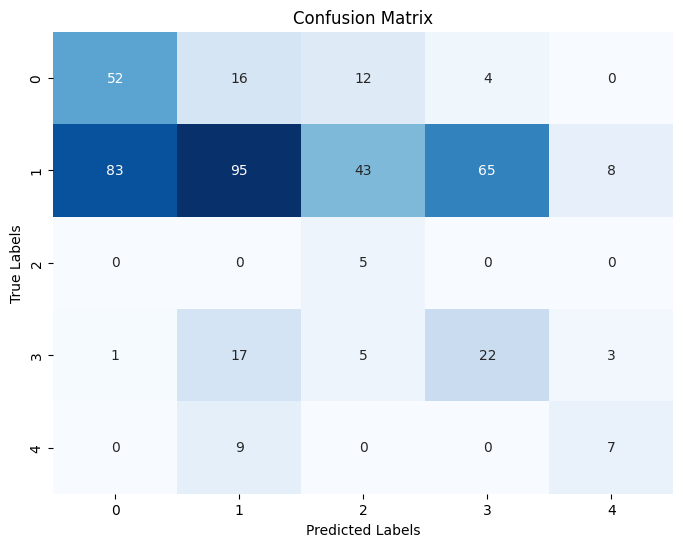

Accuracy     0.404922
Precision    0.568674
Recall       0.404922
F1 Score     0.429108
dtype: float64

In [53]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train,y_train)
evaluate_classification_model(model = dec_tree, X_test=X_test,y_test=y_test)

In [54]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure to split nodes
    'splitter': ['best', 'random'],    # Strategy to split nodes
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced'],  # Adjust weights for imbalanced classes
}

# Initialize the DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 1.0


Classification Error Metrics:
Accuracy     0.474273
Precision    0.626575
Recall       0.474273
F1 Score     0.504965
dtype: float64


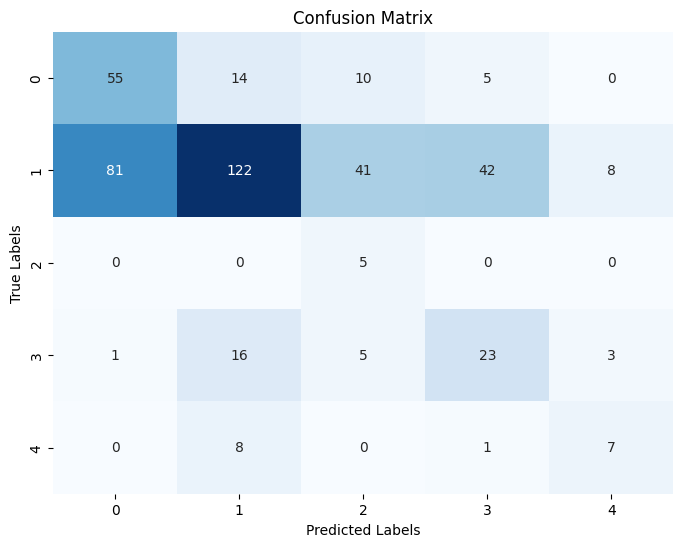

Accuracy     0.474273
Precision    0.626575
Recall       0.474273
F1 Score     0.504965
dtype: float64

In [55]:
evaluate_classification_model(model = grid_search , X_test=X_test,y_test=y_test)

Classification Error Metrics:
Accuracy     0.501119
Precision    0.588732
Recall       0.501119
F1 Score     0.528817
dtype: float64


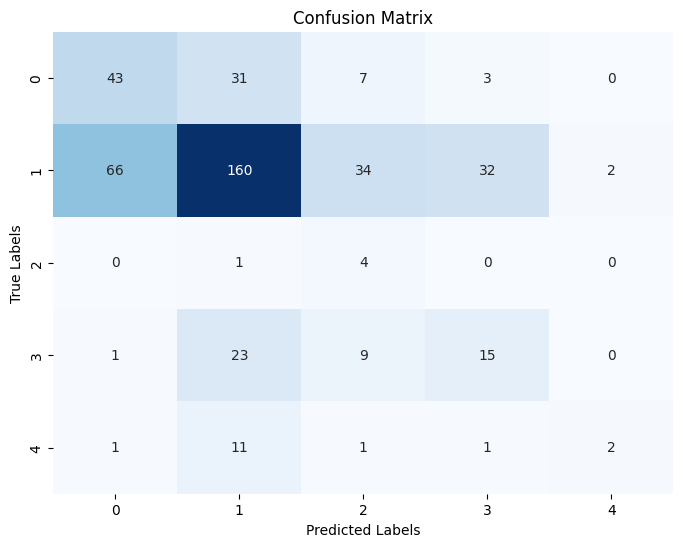

Accuracy     0.501119
Precision    0.588732
Recall       0.501119
F1 Score     0.528817
dtype: float64

In [57]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
evaluate_classification_model(model = rf, X_test=X_test,y_test=y_test)

d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Error Metrics:
Accuracy     0.192394
Precision    0.443344
Recall       0.192394
F1 Score     0.226574
dtype: float64


d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


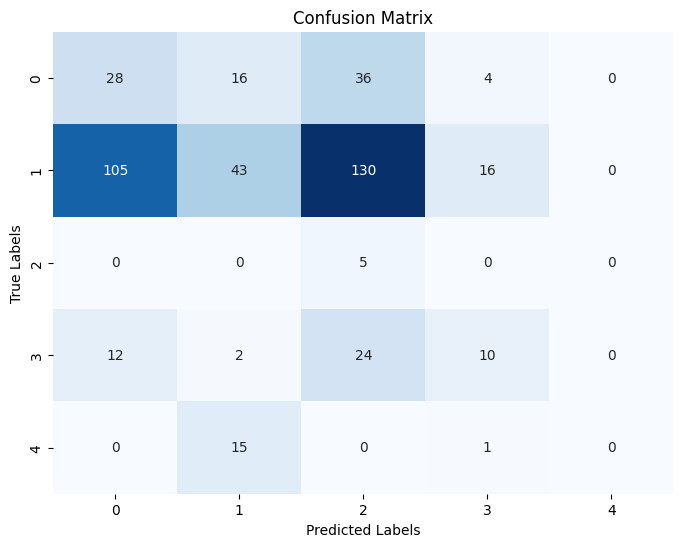

Accuracy     0.192394
Precision    0.443344
Recall       0.192394
F1 Score     0.226574
dtype: float64

In [59]:
adc = AdaBoostClassifier(random_state=42)
adc.fit(X_train,y_train)
evaluate_classification_model(model = adc , X_test=X_test,y_test=y_test)

Classification Error Metrics:
Accuracy     0.395973
Precision    0.579048
Recall       0.395973
F1 Score     0.445354
dtype: float64


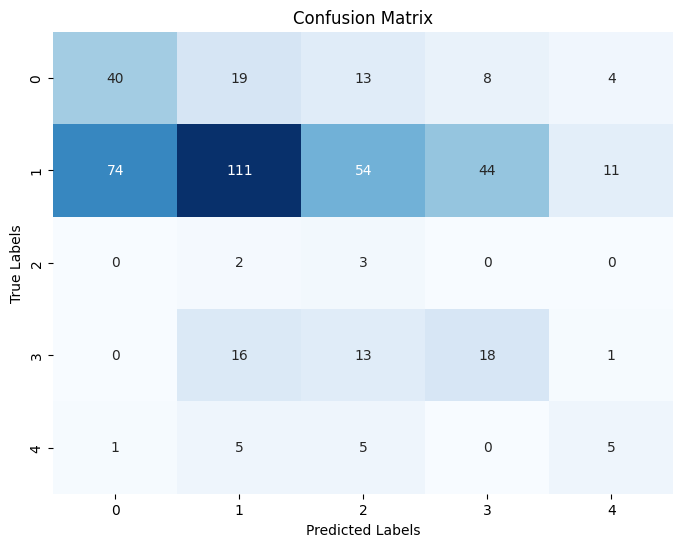

Accuracy     0.395973
Precision    0.579048
Recall       0.395973
F1 Score     0.445354
dtype: float64

In [61]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
evaluate_classification_model(model = bst , X_test=X_test,y_test=y_test)